In [ ]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ultramarine_NLP_project/train.csv')

# EDA

#### Data exploration

For our project we only need the questions and answers. So that's what we are going to use.

In [ ]:
df_train = df[['question_body', 'answer']].copy()

In [ ]:
df_train.head()

,question_body,answer
0,After playing around with macro photography on...,"I just got extension tubes, so here's the skin..."
1,I am trying to understand what kinds of places...,It might be helpful to look into the definitio...
2,I'm working on a PCB that has through-hole com...,Do you even need grooves? We make several pro...
3,"An affidavit, from what i understand, is basic...","Sending an ""affidavit"" it is a dispute between..."
4,I am trying to make a binary image. I want mor...,Check out Image Trace in Adobe Illustrator. \n...


First question

In [ ]:
df_train.iloc[0,0]

'After playing around with macro photography on-the-cheap (read: reversed lens, rev. lens mounted on a straight lens, passive extension tubes), I would like to get further with this. The problems with the techniques I used is that focus is manual and aperture control is problematic at best. This limited my setup to still subjects (read: dead insects) Now, as spring is approaching, I want to be able to shoot live insects. I believe that for this, autofocus and settable aperture will be of great help.\n\nSo, one obvious but expensive option is a macro lens (say, EF 100mm Macro) However, I am not really interested in yet another prime lens. An alternative is the electrical extension tubes.\n\nExcept for maximum focusing distance, what am I losing when using tubes (coupled with a fine lens, say EF70-200/2.8) instead of a macro lens?\n'

First answer

In [ ]:
df_train.iloc[0,1]

"I just got extension tubes, so here's the skinny.\n\n\n  ...what am I losing when using tubes...?\n\n\nA very considerable amount of light!  Increasing that distance from the end of the lens to the sensor can cut your light several stops.  Combined with the fact that you'll usually shoot stopped down - expect to need to increase your ISO considerably.\n\nThe fact the macro's are usually considered very very sharp, although I believe that 70-200mm 2.8 is supposed to be quite sharp.\n\nThe ultra low distortion typical of many macros.\n\nI wouldn't worry too much about the bokeh since the DOF will still be quite limited.\n\nCoupled on my 50mm, a full 60mm'ish extension tube results in a DOF of about a couple inches in front of the lens.  On my 70-300, its probably around 2-3 feet in front of the lens to about a foot in front of the lens.\n"

Note to self: The fact that a response contains question marks doesn't mean it's a question adressed to someone else. That can also be used for conversational purposes in order to explain an idea.

Checking size

In [ ]:
df_train.size

12158

Showing columns

In [ ]:
df_train.columns

Index(['question_body', 'answer'], dtype='object')

Showing number of columns and rows

In [ ]:
df_train.shape

(6079, 2)

#### Data integrity checks

In [ ]:
df_train.describe(include='all')

,question_body,answer
count,6079,6079
unique,3583,6079
top,Which is the best introductory textbook for Ba...,No. That's one reason everybody uses container...
freq,12,1


Unfortunately not all questions are unique in this dataset.

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6079 entries, 0 to 6078
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question_body  6079 non-null   object
 1   answer         6079 non-null   object
dtypes: object(2)
memory usage: 95.1+ KB


No Nan values

#### Analyzing the reviews

Checking the length of the questions and answers

In [ ]:
q_len = df_train['question_body'].apply(len)

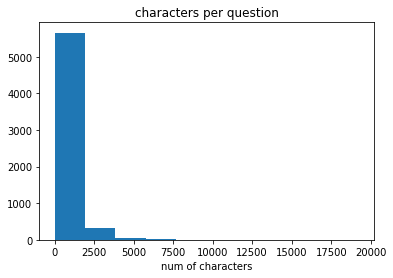

In [ ]:
plt.hist(q_len)
plt.title('characters per question')
plt.xlabel('num of characters')
plt.show()

In [ ]:
a_len = df_train['answer'].apply(len)

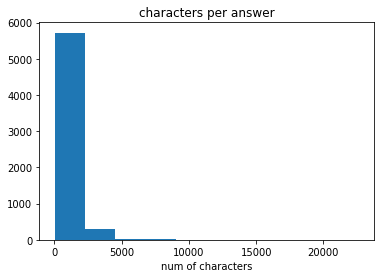

In [ ]:
plt.hist(a_len)
plt.title('characters per answer')
plt.xlabel('num of characters')
plt.show()

About 93% of the questions have character length lower than 2000.

In [ ]:
sum(q_len < 2000) / df_train.shape[0]

0.9338707024181608

About 92% of the answers have character length lower than 2000.

In [ ]:
sum(a_len < 2000) / df_train.shape[0]

0.9243296594834677

311-312 unique characters for questions and answers

In [ ]:
unique_chars_q = set(df_train['question_body'].str.cat(sep=''))
len(unique_chars_q)

311

In [ ]:
unique_chars_a = set(df_train['answer'].str.cat(sep=''))
len(unique_chars_a)

312

We can see there are some special characers including characters in other languages beside english.

In [ ]:
unique_chars_q

{'\t',
 '\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\xa0',
 '£',
 '«',
 '\xad',
 '°',
 '²',
 '´',
 'µ',
 'º',
 '»',
 'É',
 'Ö',
 '×',
 'ß',
 'á',
 'ã',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'í',
 'ï',
 'ð',
 'ó',
 'ö',
 'ø',
 'ú',
 'ü',
 'ā',
 'Č',
 'č',
 'ō',
 'š',
 'ɑ',
 'ɔ',
 'ə',
 'ɪ',
 'ɹ',
 'ʊ',
 'ʌ',
 'ʒ',
 'ʔ',
 'Δ',
 'Φ',
 'η',
 'θ',
 'π',
 'φ',
 'ψ',
 'ω',
 'Б',
 'Д',
 'Ж',
 'З',
 'И',
 'К',
 'Л',
 'М',
 'О',
 'П',
 'Р',
 'С',
 'Т',
 'Ф',
 'Я',
 'а',
 'в',
 

In [ ]:
unique_chars_a

{'\n',
 ' ',
 '!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 '{',
 '|',
 '}',
 '~',
 '\xa0',
 '£',
 '©',
 '«',
 '¬',
 '®',
 '°',
 '±',
 '²',
 '´',
 'µ',
 '·',
 '¹',
 'º',
 '»',
 'Å',
 'Æ',
 'É',
 '×',
 'Ø',
 'à',
 'á',
 'ä',
 'å',
 'æ',
 'ç',
 'è',
 'é',
 'ê',
 'ì',
 'í',
 'ð',
 'ñ',
 'ó',
 'ô',
 'ö',
 '÷',
 'ú',
 'ü',
 'ā',
 'Č',
 'ē',
 'ĥ',
 'ī',
 'ĭ',
 'İ',
 'ō',
 'š',
 'ǐ',
 'ǒ',
 'ɑ',
 'ɒ',
 'ɔ',
 'ə',
 'ɛ',
 'ɝ',
 'ɪ',
 'ɹ',
 'ʃ',
 'ʊ',
 'ʌ',
 'ʒ',
 'ˆ',
 'ˈ',
 'ˌ',
 'ː',
 '˚',
 'Δ',
 'Ε',
 'Χ',
 'Ψ',

Checking number of words

In [ ]:
num_of_words_q = df_train['question_body'].apply(lambda s: len(s.split()))

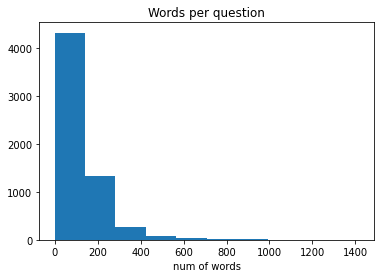

In [ ]:
plt.hist(num_of_words_q)
plt.title('Words per question')
plt.xlabel('num of words')
plt.show()

In [ ]:
num_of_words_a = df_train['answer'].apply(lambda s: len(s.split()))

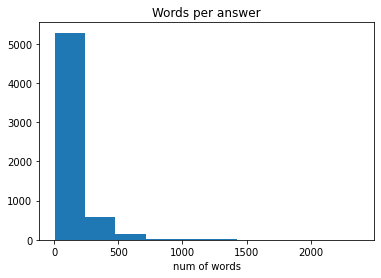

In [ ]:
plt.hist(num_of_words_a)
plt.title('Words per answer')
plt.xlabel('num of words')
plt.show()

About 94% of the questions have less words than 300.

In [ ]:
sum(num_of_words_q < 300) / df_train.shape[0]

0.9401217305477875

About 92% of the answers have less words than 300.

In [ ]:
sum(num_of_words_a < 300) / df_train.shape[0]

0.9170916269123212

# Preprocessing 

#### Combining questions and answers into one dataset

In [ ]:
df_train_q = pd.DataFrame(df_train['question_body'].copy())
df_train_q['label'] = 1

df_train_a = pd.DataFrame(df_train['answer'].copy())
df_train_a['label'] = 0

df_train_q = df_train_q.rename(columns={'question_body': 'text'})
df_train_a = df_train_a.rename(columns={'answer': 'text'})

df_train = df_train_q.append(df_train_a, ignore_index=True)

In [ ]:
df_train.shape

(12158, 2)

#### Removing non-unique rows

In [ ]:
df_train = df_train.drop_duplicates().copy()

In [ ]:
df_train.shape

(9662, 2)

#### Checking data balance after dropping non-unique rows

In [ ]:
df_train['label'].value_counts()

0    6079
1    3583
Name: label, dtype: int64

We might want to rebalance that.

In [ ]:
df_train['label'].value_counts(normalize=True)

0    0.629166
1    0.370834
Name: label, dtype: float64

#### Removing punctuation:

We'll leave the numbers for now. But the final model probably won't have numbers since they will be transcribed to words.

In [ ]:
df_train['text'] = df_train['text'].apply(
    lambda s: s.lower().translate(str.maketrans('', '', string.punctuation)))

In [ ]:
df_train['text'] = df_train['text'].replace(r'\n',' ', regex=True) 

In [ ]:
df_train.sample(5)

,text,label
8175,because george lucas doesnt have a clue it rea...,0
8840,do this ltdoctype htmlgt lthtmlgt ltheadgt lt...,0
6466,thanks to everyone for their input this proble...,0
9343,i know this thread is old but i am running int...,0
5333,i am developing a mobile application for one o...,1


Checking number of words

In [ ]:
num_of_words = [len(s.split()) for s in df_train['text']]

About 93% of the texts have less words than 300

In [ ]:
sum(np.array(num_of_words) < 300) / len(num_of_words)

0.9316911612502587

#### Splitting the dataset

In [ ]:
train, val = train_test_split(df_train, 
                              test_size=0.1, 
                              random_state=42, 
                              stratify=df_train['label'])

#### preprocessing for BERT

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!pip install transformers

In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
def df_gen(df):
  def g():
    for i, row in enumerate(df.itertuples()):
      text = row.text
      tokenized = tokenizer(text, max_length=250, padding='max_length', truncation=True)
      label = row.label

      yield {k: np.array(tokenized[k]) for k in tokenized}, label
  
  return g

input_names = ['input_ids', 'token_type_ids', 'attention_mask']
data_types = ({k: tf.int32 for k in input_names}, tf.int64)
data_shapes = ({k: tf.TensorShape([None]) for k in input_names}, tf.TensorShape([]))

df_train = tf.data.Dataset.from_generator(
    df_gen(train),
    data_types, data_shapes
).shuffle(100).batch(32).repeat(4)

df_val = tf.data.Dataset.from_generator(
    df_gen(val),
    data_types, data_shapes
).shuffle(100).batch(32).repeat(4)

# BERT model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
from transformers import TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

sparse_categorical_crossentropy = SparseCategoricalCrossentropy(
    from_logits=True, name="sparse_categorical_crossentropy"
)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-5, decay=1e-6
)

es = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
model.compile(optimizer=optimizer, loss=sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(df_train, validation_data=df_val , epochs=10, 
          callbacks=[es], steps_per_epoch=64, validation_steps=16)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/10
64/64 [==============================] - 95s 1s/step - loss: 0.4975 - accuracy: 0.7778 - val_loss: 0.2563 - val_accuracy: 0.9082
Epoch 2/10
64/64 [==============================] - 75s 1s/step - loss: 0.2101 - accuracy: 0.9253 - val_loss: 0.1438 - val_accuracy: 0.9375
Epoch 3/10
64/64 [==============================] - 75s 1s/step - loss: 0.1633 - accuracy: 0.9448 - val_loss: 0.1092 - val_accuracy: 0.9629
Epoch 4/10
64/64 [==============================] - 75s 1s/step - loss: 0.1608 - accuracy: 0.9365 - val_loss: 0.0838 - val_accuracy: 0.9766
Epoch 5/10
64/64 [==============================] - 75s 1s/step - loss: 0.1265 - accuracy: 0.9500 - val_loss: 0.0795 - val_accuracy: 0.9766
Epoch 6/10
64/64 [==============================] - 75s 1s/step - loss: 0.1198 - accuracy: 0.9619 - val_loss: 0.0773 - val_accuracy: 0.9766
Epoch 7/10
64/64 [==============================] - 75s 1s/step - loss: 0.0739 - accuracy: 0.9780 - val_loss: 0.0704 - val_accuracy: 0.9824
Epoch 8/10
64/64 [==

#### Evaluating on val set

In [ ]:
model.evaluate(df_val, use_multiprocessing=True, verbose=5)

[0.06893154978752136, 0.9803516268730164]

In [ ]:
# model.save_weights('/content/drive/MyDrive/Colab Notebooks/Ultramarine_NLP_project/Saved_models/BERT_Siri_NLP')

#### Testing on the test set

In [ ]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ultramarine_NLP_project/test.csv')

df_test_q = pd.DataFrame(df_test['question_body'].copy())
df_test_q['label'] = 1

df_test_a = pd.DataFrame(df_test['answer'].copy())
df_test_a['label'] = 0

df_test_q = df_test_q.rename(columns={'question_body': 'text'})
df_test_a = df_test_a.rename(columns={'answer': 'text'})

df_test = df_test_q.append(df_test_a, ignore_index=True)

df_test = df_test.drop_duplicates().copy()

df_test['text'] = df_test['text'].apply(
    lambda s: s.lower().translate(str.maketrans('', '', string.punctuation)))

df_test['text'] = df_test['text'].replace(r'\n',' ', regex=True) 

In [ ]:
df_test = tf.data.Dataset.from_generator(
    df_gen(df_test),
    data_types, data_shapes
).shuffle(100).batch(32).repeat(4)

In [ ]:
model.evaluate(df_test, use_multiprocessing=True, verbose=5)

[0.11703691631555557, 0.9621848464012146]

In [ ]:
# model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')
# model.compile(optimizer=optimizer, loss=sparse_categorical_crossentropy, metrics=['accuracy'])
# model.load_weights('/content/drive/MyDrive/Colab Notebooks/Ultramarine_NLP_project/Saved_models/BERT_Siri_NLP')

In [ ]:
from scipy.special import softmax

labels = ['Answer', 'Question']

tokenized = tokenizer("what is my purpose")
scores = softmax(model.predict({k: np.array(tokenized[k])[None] for k in input_names})[0], axis=1)
print(labels[np.argmax(scores)])
print(f'Confidence: {scores[0][np.argmax(scores)]}')

Question
Confidence: 0.9955686330795288


In [ ]:
tokenized = tokenizer('pass butter')
scores = softmax(model.predict({k: np.array(tokenized[k])[None] for k in input_names})[0], axis=1)
print(labels[np.argmax(scores)])
print(f'Confidence: {scores[0][np.argmax(scores)]}')

Answer
Confidence: 0.992838442325592


In [ ]:
tokenized = tokenizer('hi im new here i would like to know the meaning of life')
scores = softmax(model.predict({k: np.array(tokenized[k])[None] for k in input_names})[0], axis=1)
print(labels[np.argmax(scores)])
print(f'Confidence: {scores[0][np.argmax(scores)]}')

Question
Confidence: 0.9795100092887878


# Shap

In [ ]:
!pip install shap
import shap

     |████████████████████████████████| 371 kB 4.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509235 sha256=ed01a250da13cad8ab00aec78b7f13a79a426fac10e6ef63be08cb14134ad93b
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [ ]:
import transformers

pred = transformers.pipeline("text-classification", model=model, tokenizer=tokenizer, device=0, return_all_scores=True)

In [ ]:
explainer = shap.Explainer(pred)

In [ ]:
texts = ['what is my purpose',
         'pass butter',
         'hi im new here i would like to know the meaning of life']

In [ ]:
shap_values = explainer(texts)

  0%|          | 0/210 [00:00<?, ?it/s]

Partition explainer: 4it [00:25, 25.72s/it]               


In [ ]:
shap.plots.text(shap_values)

Words with highest shap values for label 'Question'

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


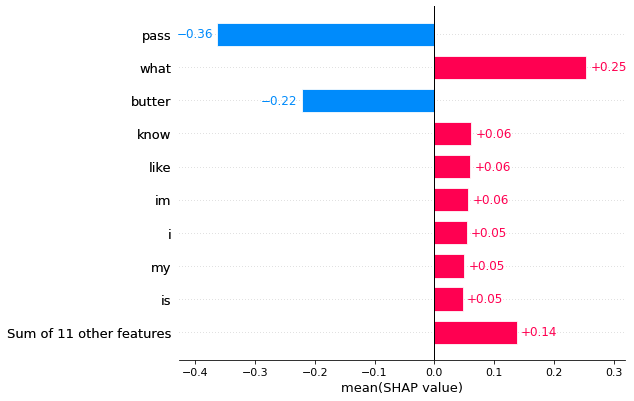

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_1"].mean(0))

Words with highest shap values for label 'Answer'

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


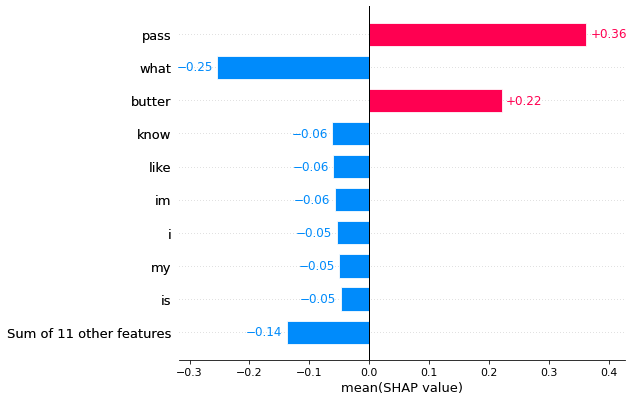

In [ ]:
shap.plots.bar(shap_values[:,:,"LABEL_0"].mean(0))

# Additional testing on different dataset

In [ ]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ultramarine_NLP_project/Datasets/utterances.csv.zip')

#### EDA

In [ ]:
df.head()

,episode,episode_order,speaker,utterance
0,57264,9,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...","It's a 2,200-mile race. To give some sense of ..."
1,57264,10,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",So for a top competitor like Lance to try to m...
2,57264,11,"NEAL CONAN, host","So in every team, presumably there's one star,..."
3,57264,12,"Ms. LOREN MOONEY (Editor-in-Chief, Bicycling M...",That's right. Each team has nine riders. And w...
4,57264,13,"NEAL CONAN, host","So slipstream, this is like drafting in car ra..."


In [ ]:
df.loc[4, 'utterance']

'So slipstream, this is like drafting in car racing, right?'

In [ ]:
df.loc[5, 'utterance']

"That's exactly right."

We can see that the data is devided to utterances of different speakers. Some are questions. The questions usually end up with a question mark. For our task we'll assume that utterances that end up with a question mark are questions.

Showing number of columns and rows

In [ ]:
df.shape

(3199858, 4)

#### Data integrity checks

In [ ]:
df.describe(include='all')

,episode,episode_order,speaker,utterance
count,3.199858e+06,3.199858e+06,3199858,3199296
unique,NaN,NaN,184963,2682926
top,NaN,NaN,"NEAL CONAN, host",(Soundbite of laughter)
freq,NaN,NaN,206098,29047
mean,7.573441e+04,3.329901e+01,NaN,NaN
std,3.737961e+04,4.167748e+01,NaN,NaN
min,1.000000e+00,0.000000e+00,NaN,NaN
25%,5.626900e+04,9.000000e+00,NaN,NaN
50%,7.580300e+04,1.800000e+01,NaN,NaN
75%,1.052298e+05,4.000000e+01,NaN,NaN


Not all utterances are unique in this dataset. as well as some Nan values.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3199858 entries, 0 to 3199857
Data columns (total 4 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   episode        int64 
 1   episode_order  int64 
 2   speaker        object
 3   utterance      object
dtypes: int64(2), object(2)
memory usage: 97.7+ MB


## Preprocessing

In [ ]:
utterances = df['utterance']

#### Removing non-unique rows

In [ ]:
utterances = utterances.drop_duplicates().copy()

In [ ]:
utterances.shape

(2682927,)

#### Removing Nan

In [ ]:
utterances = utterances.dropna()
utterances.shape

(2682926,)

#### Removing rows with brackets

In [ ]:
utterances = utterances[~utterances.str.contains("[()]")]

In [ ]:
utterances.shape

(2511529,)

#### utterances that end with a question mark get label 1, others get 0.

In [ ]:
df = pd.DataFrame(utterances)
df['label'] = df['utterance'].apply(lambda x: 1 if x[-1]=='?' else 0)

In [ ]:
df = df.rename(columns={'utterance': 'text'})

In [ ]:
df['label'].value_counts(normalize=True)

0    0.866631
1    0.133369
Name: label, dtype: float64

#### Removing punctuation

In [ ]:
df['text'] = df['text'].apply(
    lambda s: s.lower().translate(str.maketrans('', '', string.punctuation)))

df['text'] = df['text'].replace(r'\n',' ', regex=True) 

#### Splitting the dataset

We'll test only on small subset of the data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
_, test = train_test_split(df, 
                           test_size=0.001, 
                           random_state=42, 
                           stratify=df['label'])

In [ ]:
test.shape

(2512, 2)

#### Preprocessing for bert

In [ ]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 10.2 MB/s 
     |████████████████████████████████| 59 kB 8.9 MB/s 
     |████████████████████████████████| 3.3 MB 62.0 MB/s 
     |████████████████████████████████| 596 kB 85.0 MB/s 
     |████████████████████████████████| 895 kB 85.1 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
def df_gen(df):
  def g():
    for i, row in enumerate(df.itertuples()):
      text = row.text
      tokenized = tokenizer(text, max_length=250, padding='max_length', truncation=True)
      label = row.label

      yield {k: np.array(tokenized[k]) for k in tokenized}, label
  
  return g

input_names = ['input_ids', 'token_type_ids', 'attention_mask']
data_types = ({k: tf.int32 for k in input_names}, tf.int64)
data_shapes = ({k: tf.TensorShape([None]) for k in input_names}, tf.TensorShape([]))

In [ ]:
df_test = tf.data.Dataset.from_generator(
    df_gen(test),
    data_types, data_shapes
).shuffle(100).batch(32).repeat(4)

# Testing new data with BERT model

In [ ]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

sparse_categorical_crossentropy = SparseCategoricalCrossentropy(
    from_logits=True, name="sparse_categorical_crossentropy"
)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-5, decay=1e-6
)

model.compile(optimizer=optimizer, loss=sparse_categorical_crossentropy, metrics=['accuracy'])
model.load_weights('/content/drive/MyDrive/Colab Notebooks/Ultramarine_NLP_project/Saved_models/BERT_Siri_NLP')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.evaluate(df_test, use_multiprocessing=True, verbose=5)

[0.3665395975112915, 0.8849522471427917]

## Evaluating on a balanced dataset

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42) 

df, _ = rus.fit_resample(df, df['label'])

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
df = pd.DataFrame(df, columns=['text', 'label'])

In [ ]:
df['label'].value_counts()

1    334960
0    334960
Name: label, dtype: int64

In [ ]:
df['label'].value_counts()/len(df)

1    0.5
0    0.5
Name: label, dtype: float64

In [ ]:
_, test = train_test_split(df, 
                           test_size=0.005, 
                           random_state=42, 
                           stratify=df['label'])

In [ ]:
test.shape

(3350, 2)

In [ ]:
df_test = tf.data.Dataset.from_generator(
    df_gen(test),
    data_types, data_shapes
).shuffle(100).batch(32).repeat(4)

In [ ]:
model.evaluate(df_test, use_multiprocessing=True, verbose=5)

[0.7209011316299438, 0.7570149302482605]

# Training on new data

Checking number of words

In [ ]:
num_of_words = df['text'].apply(lambda s: len(s.split()))

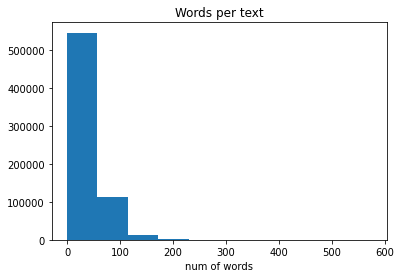

In [ ]:
plt.hist(num_of_words)
plt.title('Words per text')
plt.xlabel('num of words')
plt.show()

About 99% of the questions have less words than 140.

In [ ]:
sum(num_of_words < 140) / df.shape[0]

0.9933484595175543

In [ ]:
train, test = train_test_split(df, 
                           test_size=0.1, 
                           random_state=42, 
                           stratify=df['label'])

In [ ]:
val, test = train_test_split(test, 
                           test_size=0.05, 
                           random_state=42, 
                           stratify=test['label'])

In [ ]:
train.shape, val.shape, test.shape

((602928, 2), (63642, 2), (3350, 2))

In [ ]:
max_length = 140

In [ ]:
def df_gen(df):
  def g():
    for i, row in enumerate(df.itertuples()):
      text = row.text
      tokenized = tokenizer(text, max_length=max_length, padding='max_length', truncation=True)
      label = row.label

      yield {k: np.array(tokenized[k]) for k in tokenized}, label
  
  return g

input_names = ['input_ids', 'token_type_ids', 'attention_mask']
data_types = ({k: tf.int32 for k in input_names}, tf.int64)
data_shapes = ({k: tf.TensorShape([None]) for k in input_names}, tf.TensorShape([]))

In [ ]:
df_train = tf.data.Dataset.from_generator(
    df_gen(train),
    data_types, data_shapes
).shuffle(100).batch(32).repeat(4)

df_val = tf.data.Dataset.from_generator(
    df_gen(val),
    data_types, data_shapes
).shuffle(100).batch(32).repeat(4)

df_test = tf.data.Dataset.from_generator(
    df_gen(test),
    data_types, data_shapes
).shuffle(100).batch(32).repeat(4)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

sparse_categorical_crossentropy = SparseCategoricalCrossentropy(
    from_logits=True, name="sparse_categorical_crossentropy"
)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-5, decay=1e-6
)

es = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)
model.compile(optimizer=optimizer, loss=sparse_categorical_crossentropy, metrics=['accuracy'])
model.fit(df_train, validation_data=df_val , epochs=40, 
          callbacks=[es], steps_per_epoch=64, validation_steps=16)

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/40
64/64 [==============================] - 54s 637ms/step - loss: 0.4688 - accuracy: 0.8115 - val_loss: 0.2672 - val_accuracy: 0.9180
Epoch 2/40
64/64 [==============================] - 38s 600ms/step - loss: 0.2424 - accuracy: 0.9165 - val_loss: 0.2247 - val_accuracy: 0.9258
Epoch 3/40
64/64 [==============================] - 38s 600ms/step - loss: 0.2301 - accuracy: 0.9180 - val_loss: 0.2015 - val_accuracy: 0.9277
Epoch 4/40
64/64 [==============================] - 38s 601ms/step - loss: 0.2258 - accuracy: 0.9146 - val_loss: 0.1881 - val_accuracy: 0.9316
Epoch 5/40
64/64 [==============================] - 38s 601ms/step - loss: 0.2005 - accuracy: 0.9292 - val_loss: 0.1860 - val_accuracy: 0.9297
Epoch 6/40
64/64 [==============================] - 38s 601ms/step - loss: 0.1839 - accuracy: 0.9204 - val_loss: 0.1479 - val_accuracy: 0.9473
Epoch 7/40
64/64 [==============================] - 38s 601ms/step - loss: 0.1618 - accuracy: 0.9399 - val_loss: 0.1571 - val_accuracy: 0.9414

In [ ]:
model.save_weights('/content/drive/MyDrive/Colab Notebooks/Ultramarine_NLP_project/Saved_models/BERT_Siri_NLP_NPR')

In [ ]:
model.evaluate(df_test, use_multiprocessing=True, verbose=5)

[0.15986795723438263, 0.9423880577087402]

## testing on old data

In [1]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
!pip install transformers

     |████████████████████████████████| 3.1 MB 5.1 MB/s 
     |████████████████████████████████| 895 kB 35.7 MB/s 
     |████████████████████████████████| 596 kB 50.8 MB/s 
     |████████████████████████████████| 3.3 MB 36.3 MB/s 
     |████████████████████████████████| 59 kB 6.7 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
from transformers import BertTokenizer

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

Downloading:   0%|          | 0.00/226k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/455k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [5]:
def df_gen(df):
  def g():
    for i, row in enumerate(df.itertuples()):
      text = row.text
      tokenized = tokenizer(text, max_length=250, padding='max_length', truncation=True)
      label = row.label

      yield {k: np.array(tokenized[k]) for k in tokenized}, label
  
  return g

input_names = ['input_ids', 'token_type_ids', 'attention_mask']
data_types = ({k: tf.int32 for k in input_names}, tf.int64)
data_shapes = ({k: tf.TensorShape([None]) for k in input_names}, tf.TensorShape([]))

In [6]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ultramarine_NLP_project/test.csv')

df_test_q = pd.DataFrame(df_test['question_body'].copy())
df_test_q['label'] = 1

df_test_a = pd.DataFrame(df_test['answer'].copy())
df_test_a['label'] = 0

df_test_q = df_test_q.rename(columns={'question_body': 'text'})
df_test_a = df_test_a.rename(columns={'answer': 'text'})

df_test = df_test_q.append(df_test_a, ignore_index=True)

df_test = df_test.drop_duplicates().copy()

df_test['text'] = df_test['text'].apply(
    lambda s: s.lower().translate(str.maketrans('', '', string.punctuation)))

df_test['text'] = df_test['text'].replace(r'\n',' ', regex=True) 

In [7]:
df_test = tf.data.Dataset.from_generator(
    df_gen(df_test),
    data_types, data_shapes
).shuffle(100).batch(32).repeat(4)

In [8]:
from transformers import TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

sparse_categorical_crossentropy = SparseCategoricalCrossentropy(
    from_logits=True, name="sparse_categorical_crossentropy"
)

optimizer = tf.keras.optimizers.Adam(
    learning_rate=1e-5, decay=1e-6
)

model.compile(optimizer=optimizer, loss=sparse_categorical_crossentropy, metrics=['accuracy'])
model.load_weights('/content/drive/MyDrive/Colab Notebooks/Ultramarine_NLP_project/Saved_models/BERT_Siri_NLP_NPR')

Downloading:   0%|          | 0.00/511M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [9]:
model.evaluate(df_test, use_multiprocessing=True, verbose=5)

[0.9672189950942993, 0.6880252361297607]